In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import radians, cos, sin, asin, sqrt, floor

### Define functions

In [2]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

def smooth(x, window_len=11, window='hanning'):
    x = np.array(x)
    nans, y = nan_helper(x)
    x[nans] = np.interp(y(nans), y(~nans), x[~nans])
    s = np.r_[x[window_len - 1:0:-1], x, x[-2:-window_len - 1:-1]]
    if window == 'flat':  # moving average
        w = np.ones(window_len, 'd')
    else:
        w = eval('np.' + window + '(window_len)')
    y = np.convolve(w / w.sum(), s, mode='same')
    return y

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r

### Plotting

#### Plot Pixelwise

/home/jamesrunnalls/anaconda3/envs/thetis/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  from ipykernel import kernelapp as app
/home/jamesrunnalls/anaconda3/envs/thetis/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/jamesrunnalls/anaconda3/envs/thetis/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


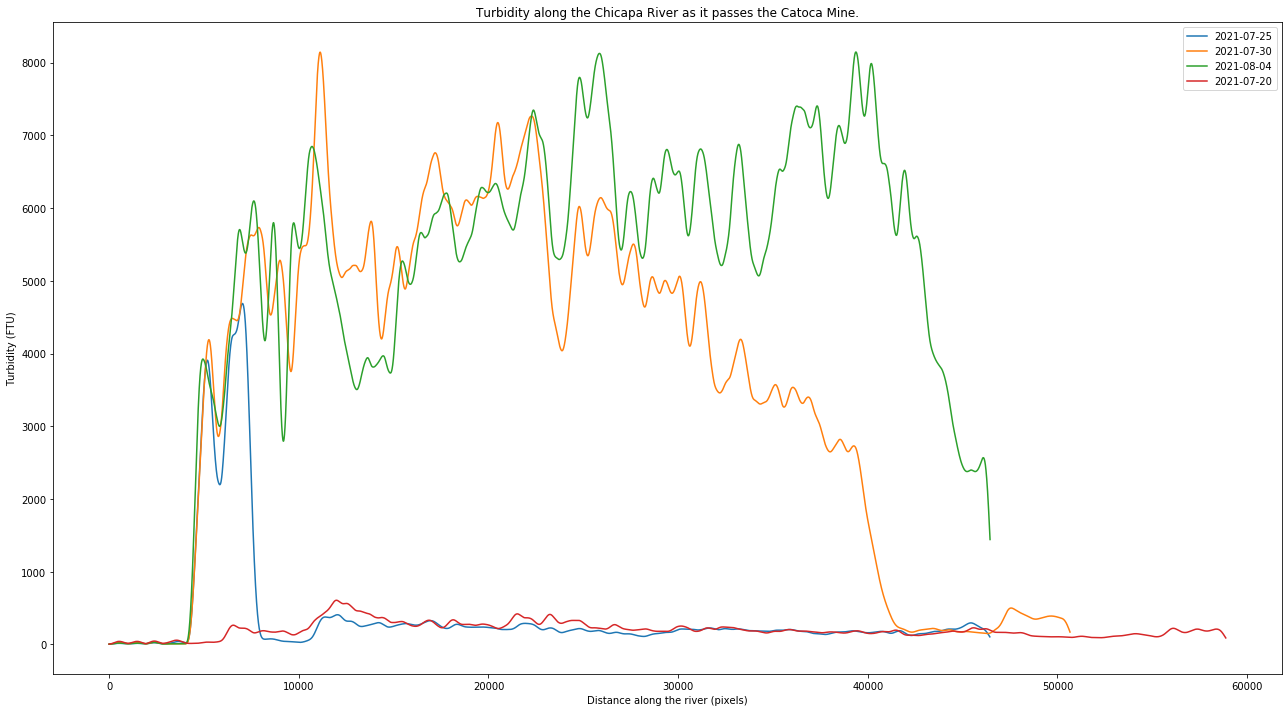

In [3]:
folder = "../data/csv"
files = os.listdir(folder)
files.sort()
files = files[1:] + [files[0]]
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_xlabel("Distance along the river (pixels)")
ax.set_ylabel("Turbidity (FTU)")
for file in files:
    df = pd.read_csv(os.path.join(folder, file))
    y = smooth(df["Turbidity"], window_len=1000)
    x = range(len(y)) 
    ax.plot(x, y, label=file.split("_")[1].split(".")[0])
plt.title("Turbidity along the Chicapa River as it passes the Catoca Mine.")
plt.legend()
plt.tight_layout()

#### Plot Distance

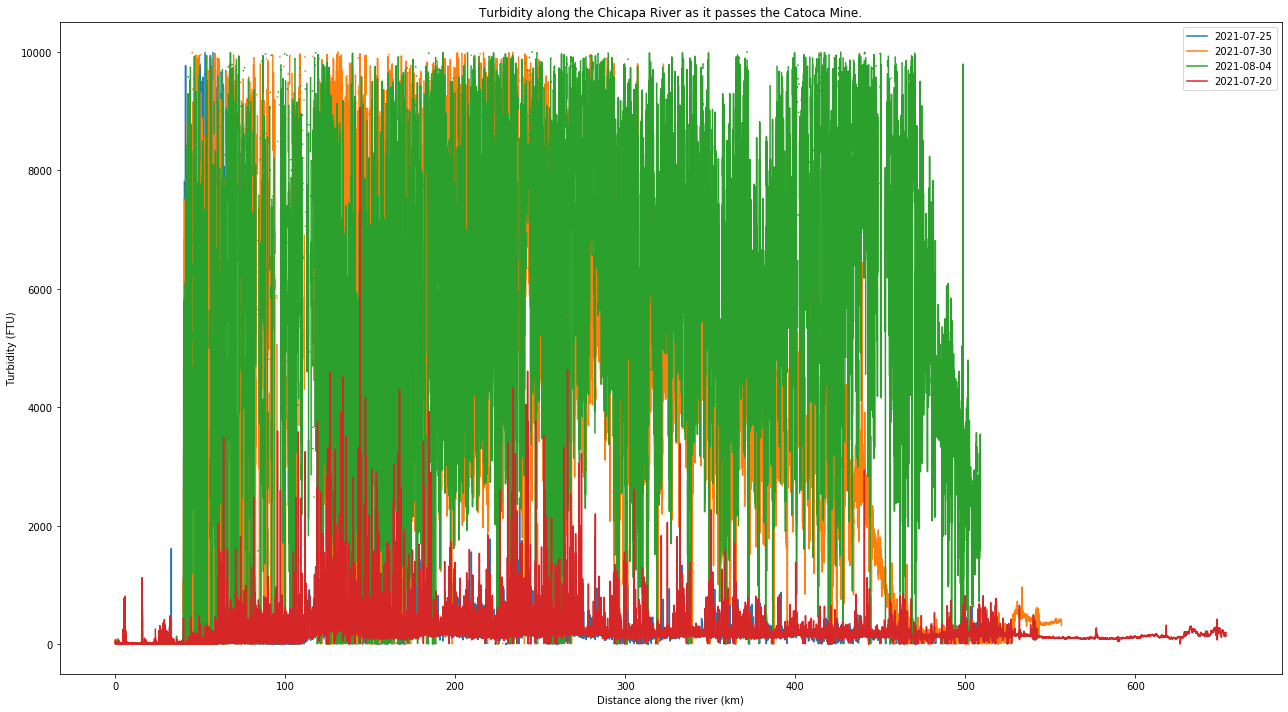

In [4]:
folder = "../data/csv"
files = os.listdir(folder)
files.sort()
files = files[1:] + [files[0]]
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_xlabel("Distance along the river (km)")
ax.set_ylabel("Turbidity (FTU)")
for file in files:
    df = pd.read_csv(os.path.join(folder, file))
    distance = [0]
    for i in range(1, len(df)):
        distance.append(distance[-1] + haversine(df["Longitude"][i], df["Latitude"][i], df["Longitude"][i - 1], df["Latitude"][i-1]))
    y = df["Turbidity"]
    x = distance   
    ax.plot(distance, y, label=file.split("_")[1].split(".")[0])
plt.title("Turbidity along the Chicapa River as it passes the Catoca Mine.")
plt.legend()
plt.tight_layout()